<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-5/blob/main/ActividadSemanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TC4029 Ciencia y analítica de datos
##Actividad Semanal 4
###Profesor Jobish Vallikavungal

**EQUIPO 5:**

* Laura Irán González Ojeda
 * Matrícula: A01794099

* Marcela Alejandra Rosales Jiménez
 * Matrícula: A01032022

Fecha de entrega: 11 de Octubre de 2022

**Objetivo:** Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

# Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

 * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

### Importación del dataset

A continuación se realizará el proceso de importación del dataset, aplicando el procedimiento de selección y limpieza que se siguió en la [práctica 3](semana3_actividad1.ipynb), ya que se estará utilizando el mismo universo de datos. 

Esto con el objetivo de tener un conjunto de datos sin valores atípicos, nulos y listo para su análisis.

In [ ]:
# Importar librarias necesarias para el análisis de datos
import pandas as pd
import numpy as np

# Definir ruta de archivo CSV y exportar los datos del dataset
data_path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(data_path)

df2 = df.dropna(subset=['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'])

# Transformacion de columna X3
mask = (df2['X3'] == 0) | (df2['X3'] == 5 ) | (df2['X3'] == 6 ) | (df2['X3'].isna())
df2.iloc[mask] = 4

# Transformacion de columna X4
mask = (df2['X4'] == 0) | (df2['X4'].isna())
df2.iloc[mask] = 3

# Transformacion de columna X5
mask = (df2['X5'].isna())
df2.iloc[mask] = -1

# Transformacion de columnas X6 a X11
col_historial_pagos = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
for col in col_historial_pagos:
    # Transformar pay duly de -1 a 0
    mask = (df2[col] == -1)
    df2.iloc[mask] = 0
    # Transformar valores atipicos a -1
    mask = (df2[col] < 0) | (df2[col].isna())
    df2.iloc[mask] = -1

df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparación y normalización del dataset

Para determinar el número de componentes principales es necesario normalizar el conjunto de datos y eliminar las variables categóricas. 

En este caso las columnas con variables categóricas son X2 (genero), X3 (educación) y X4 (estado marital), así como las columnas X6 a X11 (historial de pagos atrasados). También se elimina el ID del dataset.



In [ ]:
# Eliminar ID y variables categoricas X2, X3 y X4
df2 = df2.drop(['ID', 'X2', 'X3', 'X4'], axis=1)
# Eliminamos las variables categoricas X6-X11
df2 = df2.drop(['X6', 'X7', 'X8', 'X9', 'X10', 'X11'], axis=1)

In [ ]:
df2

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Analisis PCA

La técnica de Principal Component Analysis (PCA) nos permite ver los componentes principales y cuál es su aportación de varianza en términos de las columnas del dataset.

A continuación se seguirá este procedimiento con el dataset de las tarjetas de crédito.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Crear objeto PCA
pcs = PCA()
# Hacemos el fit de PCA utilizando el dataset df2 normalizado con la utileria preprocessing
pcs.fit(preprocessing.scale(df2))

PCA()

In [ ]:
# Esta configuracion de jupyter nos permite ver todas las columnas del dataframe
pd.set_option("display.max_columns", None)

In [ ]:
# Usamos el objeto pcs para obtener un resumen de los componentes principales y su varianza

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.8305,1.0302,0.9613,0.9178,0.9001,0.8661,0.8617,0.8327,0.8033,0.5397,0.3877,0.1871,0.1360,0.1200,0.1009
Proportion of variance,0.5341,0.0708,0.0616,0.0562,0.0540,0.0500,0.0495,0.0462,0.0430,0.0194,0.0100,0.0023,0.0012,0.0010,0.0007
Cumulative proportion,0.5341,0.6048,0.6664,0.7226,0.7766,0.8266,0.8761,0.9223,0.9654,0.9848,0.9948,0.9971,0.9984,0.9993,1.0000


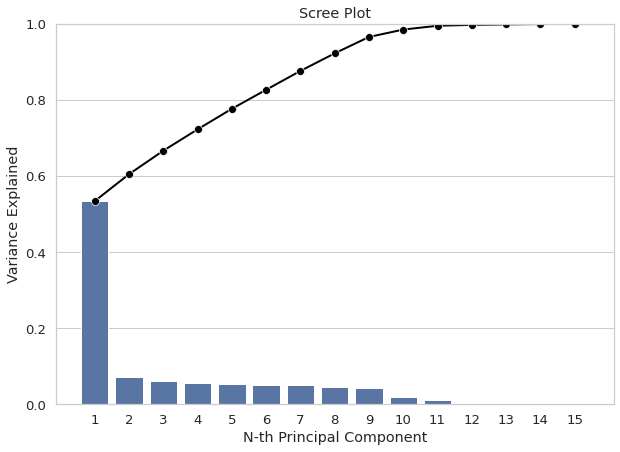

In [ ]:
# Graficamos la promorción acumulada de los 15 componentes que se obtuvieron 

PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Después de hacer el análisis PCA y ver la Proporción Acumulada, hemos encontrado que las primeras 9 columnas nos dan una varianza acumulada de más del 95%. Lo cual nos permite reducir de 15 columnas a 9, sin perder demasiada información.

In [ ]:
varianza_acumulada_pc9 = ((pcsSummary_df.iloc[2][8])*100)
print(f"Varianza acumulada Componente Principal 9 = {varianza_acumulada_pc9}")

Varianza acumulada Componente Principal 9 = 96.53596276679052


## Paso 2: Interprete cada componente principal en términos de las variables originales

 * Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
# Obtenemos los scores de los Componentes Principales
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df2.columns
                                )
pcsComponents_df.iloc[:,:9]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X1,0.295097,0.003443,0.016126,0.007134,0.025098,-0.048266,0.014669,-0.108973,-0.301369
X5,0.221918,-0.296909,0.060551,-0.026980,-0.029029,-0.116959,0.003647,-0.281239,-0.787294
X12,0.334578,-0.044946,-0.184440,0.099330,0.067306,0.021583,-0.029365,0.049991,0.060211
X13,0.338563,-0.041323,-0.178004,0.083021,0.046702,-0.000338,-0.073621,0.003481,0.102590
X14,0.341176,-0.034617,-0.167478,0.072530,-0.011511,-0.046655,-0.033725,0.070974,0.107557
X15,0.341287,-0.032876,-0.166229,0.052012,-0.013976,0.017208,0.026634,0.047982,0.125822
X16,0.338614,-0.035052,-0.164278,0.029461,-0.015042,0.071481,-0.016145,0.074231,0.110495
X17,0.333334,-0.037347,-0.168331,-0.046697,0.062780,0.031884,0.001812,0.076673,0.117289
X18,0.186287,0.172456,0.296673,-0.124579,-0.297237,-0.314589,-0.472932,-0.573321,0.293613
X19,0.179068,0.162517,0.254781,-0.145060,-0.528059,-0.458089,0.343746,0.485501,-0.056597


**PC1**
- Los meses de abril a septiembre del 2005 los clientes tienen una mayor cantidad de deuda en sus estados de cuenta.
- Podemos ver que están relacionados entre ellos. Esto tiene sentido ya que esas 6 categorías pertenecen al mismo grupo (valor del estado de cuenta), pero en distinto mes. 
- También nos muestra que las categorías X12-X17 se relacionan con X1, que es el monto de crédito otorgado a cada cliente.
- Por lo que podríamos decir que a mayor valor en el estado de cuenta, mayor crédito es otorgado a un cliente.

In [ ]:
pcsComponents_df.PC1.nlargest(7)

X15    0.341287
X14    0.341176
X16    0.338614
X13    0.338563
X12    0.334578
X17    0.333334
X1     0.295097
Name: PC1, dtype: float64

**PC2**

- Podemos visualizar que la variable Y (probabilidad de otorgar crédito) y X5 (edad) están relacionadas ya que obteniendo los números negativos interpretamos que a menos edad es menos la probabilidad de que se otorgue un crédito.

In [ ]:
print(pcsComponents_df.PC2.nsmallest(2))

Y    -0.869760
X5   -0.296909
Name: PC2, dtype: float64


**PC3**

- Interpretamos que a mejor historial de pagos (X18-X23) es mayor la probabilidad de otorgar o mantener un crédito (Y).

In [ ]:
print(pcsComponents_df.PC3.nlargest(7))

X23    0.528168
Y      0.373907
X21    0.343306
X18    0.296673
X22    0.290993
X19    0.254781
X20    0.212447
Name: PC3, dtype: float64


**PC4 a PC8**

- A continuación mostramos los valores máximos y mínimos de los componentes principales 4 a 8. Estos componentes no son datos representativos para el análisis de datos porque tienen una menor proporción de varianza.

In [ ]:
print("largest")
print(pcsComponents_df.PC4.nlargest(7))
print("smallest")
print(pcsComponents_df.PC4.nsmallest(7))

largest
X23    0.785263
X12    0.099330
X13    0.083021
X14    0.072530
X15    0.052012
X16    0.029461
X1     0.007134
Name: PC4, dtype: float64
smallest
X22   -0.433530
X21   -0.331296
X19   -0.145060
X20   -0.132534
X18   -0.124579
Y     -0.054552
X17   -0.046697
Name: PC4, dtype: float64


In [ ]:
print("largest")
print(pcsComponents_df.PC5.nlargest(7))
print("smallest")
print(pcsComponents_df.PC5.nsmallest(7))

largest
X22    0.740257
X23    0.198392
X12    0.067306
X17    0.062780
X13    0.046702
X1     0.025098
X14   -0.011511
Name: PC5, dtype: float64
smallest
X19   -0.528059
X18   -0.297237
X20   -0.165032
X21   -0.063015
Y     -0.039723
X5    -0.029029
X16   -0.015042
Name: PC5, dtype: float64


In [ ]:
print("largest")
print(pcsComponents_df.PC6.nlargest(7))
print("smallest")
print(pcsComponents_df.PC6.nsmallest(7))

largest
X21    0.563974
X20    0.505162
X16    0.071481
X17    0.031884
Y      0.028781
X12    0.021583
X23    0.019643
Name: PC6, dtype: float64
smallest
X19   -0.458089
X18   -0.314589
X22   -0.302729
X5    -0.116959
X1    -0.048266
X14   -0.046655
X13   -0.000338
Name: PC6, dtype: float64


In [ ]:
print("largest")
print(pcsComponents_df.PC7.nlargest(7))
print("smallest")
print(pcsComponents_df.PC7.nsmallest(7))

largest
X20    0.636491
X19    0.343746
X22    0.163647
X15    0.026634
X1     0.014669
Y      0.014132
X23    0.004049
Name: PC7, dtype: float64
smallest
X18   -0.472932
X21   -0.466300
X13   -0.073621
X14   -0.033725
X12   -0.029365
X16   -0.016145
X17    0.001812
Name: PC7, dtype: float64


In [ ]:
print("largest")
print(pcsComponents_df.PC8.nlargest(7))
print("smallest")
print(pcsComponents_df.PC8.nsmallest(7))

largest
X19    0.485501
X21    0.371774
Y      0.082389
X23    0.080910
X17    0.076673
X16    0.074231
X14    0.070974
Name: PC8, dtype: float64
smallest
X18   -0.573321
X20   -0.413879
X5    -0.281239
X1    -0.108973
X13    0.003481
X22    0.023155
X15    0.047982
Name: PC8, dtype: float64


In [ ]:
print("largest")
print(pcsComponents_df.PC9.nlargest(7))
print("smallest")
print(pcsComponents_df.PC9.nsmallest(7))

largest
X18    0.293613
Y      0.284059
X15    0.125822
X20    0.124379
X17    0.117289
X16    0.110495
X14    0.107557
Name: PC9, dtype: float64
smallest
X5    -0.787294
X1    -0.301369
X21   -0.175123
X19   -0.056597
X23   -0.014782
X12    0.060211
X22    0.073292
Name: PC9, dtype: float64


## Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

[]

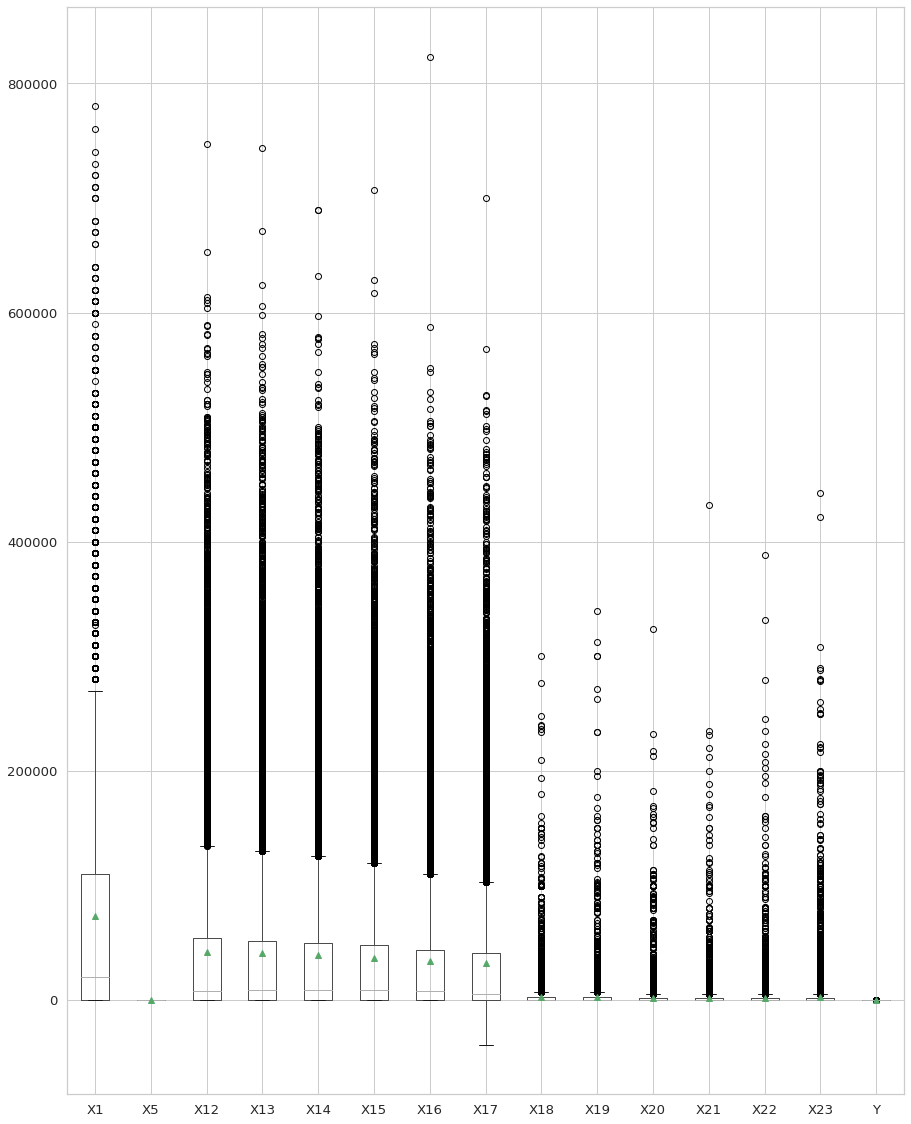

In [ ]:
df_cols = df2.columns.to_list()
boxplot = df2.boxplot(figsize=(15, 20), column=df_cols, labels=df_cols, showmeans=True)
boxplot.plot()

## Conclusiones parte 1

Al visualizar la gráfica de boxplot vemos que hay datos que quedan por encima de los extremos de los bigotes de la gráfica, por lo tanto encontramos que efectivamente existen valores atípicos en el dataframe df2.

Después de realizar el procedimiento PCA encontramos los componentes principales que abstraen la información del dataset, con sus aportaciones de varianza. Esto nos permite reducir la dimensionalidad de las columnas sin perder mucha información, e identificar las correlaciones entre las variables del dataset.






# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

1. **¿Cuál es el número de componentes mínimo y por qué?** 

Después de hacer el análisis PCA y ver la Proporción Acumulada, hemos encontrado que los componentes mínimos para lograr varianza acumulada de más del 95% son en total 9. Lo cual nos permite reducir de 15 columnas a 9, sin perder demasiada información.

2. **¿Cuál es la variación de los datos que representan esos componentes?**

La Varianza acumulada del Componente Principal 9 es de 96.53596276679052.

3. **¿Cuál es la pérdida de información después de realizar PCA?**

La pérdida de información sería de un 3.4640372332094.

4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Concluimos que los componentes PC1, PC2 y PC3 contienen los coeficientes más representativos en el análisis de datos porque tienen mayor proporción de varianza, lo contrario a los componentes PC4 a PC8.

El análisis individual de los 3 componentes más importantes representa diferentes correlaciones de las variables originales:

**PC1**. Correlación de las columnas X1, X12, X13, X14, X15, X16, X17 (Correlación entre los meses de deuda en estados de cuenta y el monto otorgado a cada cliente).

Análisis obtenido:
* Los meses de abril a septiembre del 2005 los clientes tienen una mayor cantidad de deuda en sus estados de cuenta.
* Podemos ver que están relacionados entre ellos. Esto tiene sentido ya que esas 6 categorías pertenecen al mismo grupo (valor del estado de cuenta), pero en distinto mes.
* También nos muestra que las categorías X12-X17 se relacionan con X1, que es el monto de crédito otorgado a cada cliente.
* Por lo que podríamos decir que, a mayor valor en el estado de cuenta, mayor crédito es otorgado a un cliente.

**PC2**. Correlación de las columnas Y y X5. (Correlación entre la probabilidad de otorgar un crédito y la edad del cliente).

Análisis obtenido:
* Podemos visualizar que la variable Y (probabilidad de otorgar crédito) y X5 (edad) están relacionadas ya que obteniendo los números negativos interpretamos que a menos edad es menos la probabilidad de que se otorgue un crédito.

**PC3**. Correlación de las columnas Y, X18, X19, X20, X21, X22, X23. (Correlación entre la probabilidad de otorgar un crédito y el historial mensual de pagos).

Análisis obtenido:
* Interpretamos que a mejor historial de pagos (X18-X23) es mayor la probabilidad de otorgar o mantener un crédito (Y).

5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

El Análisis de Componentes Principales o PCA es aplicado para reducir la complejidad de los datos en un dataset grande que pareciera no estar correlacionado e identificar las características más importantes.

PCA permite identificar las variables que aportan más información de un dataset, y descartar las menos relevantes. El proceso de descarte de las variables menos relevantes se le conoce como la reducción de dimensionalidad, que de hecho es una de las aplicaciones principales del PCA.

Otra de las aplicaciones de PCA es la detección de anomalías, ya que PCA analiza las variables que definen lo que corresponde a un comportamiento normal, para después aplicar distintas métricas de distancia (varianza) que identifiquen los casos que se alejan de este comportamiento.

Las dos aplicaciones anteriormente descritas (reducción de dimensionalidad y detección de anomalías) son de suma importancia cuando se aplican algoritmos de Machine Learning, sobre todo en aquellos algoritmos que pertenecen al Aprendizaje no supervisado (unsupervised learning), pues los métodos de unsupervised learning tienen el objetivo de predecir una variable a partir de una serie de predictores. El principal problema al que se enfrentan los métodos de unsupervised learning es la dificultad para validar los resultados dado que no se dispone de una variable respuesta que permita contrastarlos. Por lo que PCA permite “condensar” la información aportada por múltiples variables en pocos componentes. (Amat, 2017)

# Referencias
Amat, J. (2017, Junio). Análisis de Componentes Principales. Retrieved Octubre 9, 2022, from cienciadedatos.net: https://www.cienciadedatos.net/documentos/35_principal_component_analysis#Introducci%C3%B3n

Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Birmingham: Packt Publishing Ltd.

Na8. (2018, Octubre 8). Comprende Principal Component Analysis. Retrieved Octubre 8, 2022, from Aprende Machine Learning: https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

Recuero, P. (2018, Junio 6). Python para todos : ¿Qué es el análisis de Componentes Principales o PCA? Retrieved Octubre 10, 2022, from Think Big: https://empresas.blogthinkbig.com/python-para-todos-que-es-el-pca/